In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [4]:
# 꽃 이미지가 저장된 폴더에서 이미지 파일 가져오기 & 라벨링
# X: 꽃 이미지 파일을 numpy 배열로 변환하여 X 배열에 저장
# Z: 꽃 이미지 마다 라벨(꽃 이름)을 영문자열로 Z 배열에 저장

X=[] #리스트 변수
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='/content/drive/MyDrive/Colab Notebooks/인공지능/12주차/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/Colab Notebooks/인공지능/12주차/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/Colab Notebooks/인공지능/12주차/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/Colab Notebooks/인공지능/12주차/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/Colab Notebooks/인공지능/12주차/flowers/rose'

In [5]:
from tqdm import tqdm
import os
import cv2

# 폴더에 저장된 이미지 파일들을 Numpy 데이터로 변환
def make_train_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label = flower_type
    path = os.path
    path = os.path.join(DIR, img)
    img2 = cv2.imread(path, cv2.IMREAD_COLOR)
    img2 = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))
    
    X.append(img2)
    Z.append(label)

In [6]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 50/50 [00:07<00:00,  6.27it/s]


50


100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


100


100%|██████████| 50/50 [00:08<00:00,  6.23it/s]


150


100%|██████████| 50/50 [00:07<00:00,  6.42it/s]


200


100%|██████████| 50/50 [00:08<00:00,  6.12it/s]

250


In [7]:
# Z 배열에 저장된 꽃 이름(문자열)을 원핫인코딩 방식으로 변환하여 Y 배열에 저장
# X 배열에 저장된 꽃 이미지는 모든 값을 255로 나누어줌
# 입력 값을 1보다 작은 값으로 만들기 위함

le = LabelEncoder()
tmp = le.fit_transform(Z)
Y = pd.get_dummies(tmp).values

X = np.array(X)
X = X/255.0

In [8]:
# 1. 데이터 준비: 훈련 데이터와 시험 데이터로 분할하기
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200, 224, 224, 3), (50, 224, 224, 3), (200, 5), (50, 5))

In [10]:
# 2. 모델 구성하기(AlexNet 구성)
img_shape = (IMG_SIZE, IMG_SIZE, 3)

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=img_shape, kernel_size=(11,11),
                 strides=4, padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=1,
                 padding='same', activation='relu'))
# Pooling 사이즈를 줄여주는 역할 
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1,
                 padding='same', activation='relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1,
                 padding='same', activation='relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1,
                 padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(2048, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(1024, activation='relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                      

In [11]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 4. 모델 학습시키기
# 이미지 데이터 증폭을 위한 설정
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

hist = model.fit(datagen.flow(x_train, y_train), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 36s 531ms/step - loss: 2.2380 - accuracy: 0.3100 - val_loss: 50.2329 - val_accuracy: 0.2800
Epoch 2/50
7/7 [==============================] - 3s 357ms/step - loss: 1.8302 - accuracy: 0.4200 - val_loss: 198.4582 - val_accuracy: 0.2800
Epoch 3/50
7/7 [==============================] - 2s 337ms/step - loss: 1.7074 - accuracy: 0.4450 - val_loss: 256.4456 - val_accuracy: 0.1200
Epoch 4/50
7/7 [==============================] - 2s 388ms/step - loss: 1.6702 - accuracy: 0.4750 - val_loss: 172.1601 - val_accuracy: 0.1200
Epoch 5/50
7/7 [==============================] - 2s 385ms/step - loss: 1.7176 - accuracy: 0.4450 - val_loss: 115.5070 - val_accuracy: 0.1200
Epoch 6/50
7/7 [==============================] - 2s 336ms/step - loss: 1.4457 - accuracy: 0.4850 - val_loss: 75.4014 - val_accuracy: 0.2600
Epoch 7/50
7/7 [==============================] - 2s 345ms/step - loss: 1.3365 - accuracy: 0.5000 - val_loss: 50.3963 - val_accuracy: 0.2800
Epoch 8/

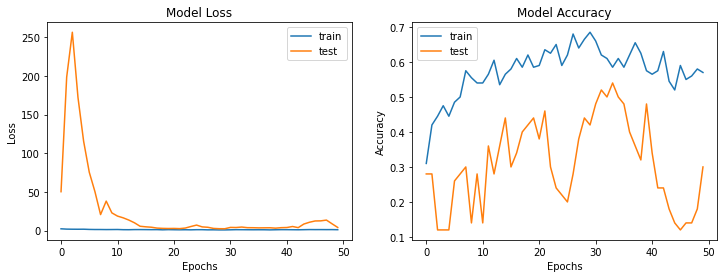

In [14]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [16]:
# 6. 학습된 모델로 예측하기
pred = model.predict(x_test)
pred_num = np.argmax(pred, axis=1)
pred_num

array([3, 4, 4, 3, 3, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 2, 4])

In [20]:
# 예측결과 올바른 결과 8개(prop_class)와 틀린 결과 8개(mis_class) 선택
#x_test : 이미지 종류, y_test : 정답(꽃)
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
  if (np.argmax(y_test[1] == pred_num[i])): #정답 == 예측값
    prop_class.append(i)
  if(len(prop_class) == 8):
    break

i = 0
for i in range(len(y_test)):
  if (not np.argmax(y_test[1] == pred_num[i])): #정답 != 예측값
    mis_class.append(i)
  if(len(mis_class) == 8):
    break

In [29]:
prop_class, mis_class

([8], [0, 1, 2, 3, 4, 5, 6, 7])

IndexError: ignored

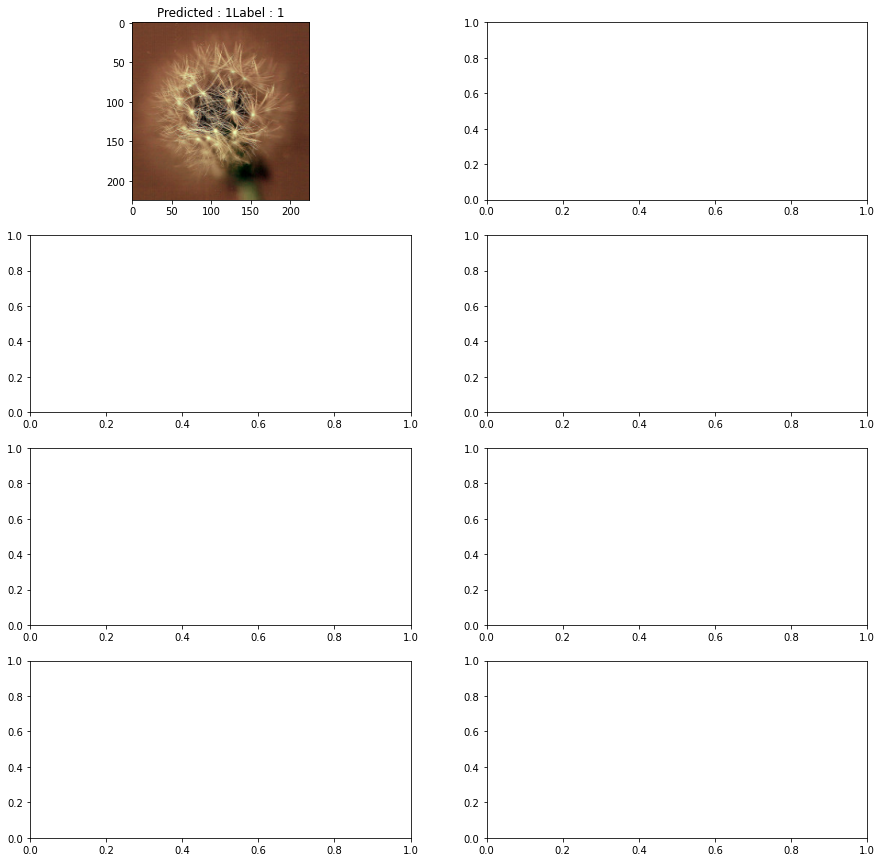

In [38]:
# 올바른 예측 결과 보여주기

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    ax[i, j].imshow(x_test[prop_class[count]])
    #ax[i, j].imshow(x_test[prop_class[count]])
    ax[i, j].set_title("Predicted : "+str(pred_num[prop_class[count]]) + 
                       "Label : " + str(np.argmax([y_test[prop_class[count]]])))
    count += 1

plt.show()

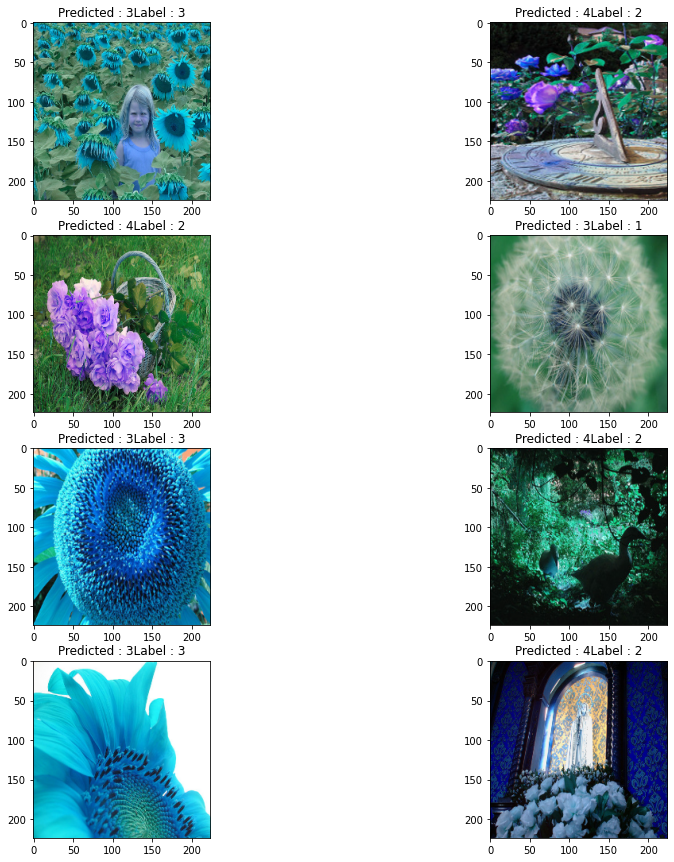

In [37]:
# 잘못된 결과 보여주기
count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    ax[i, j].imshow(x_test[mis_class[count]])
    #ax[i, j].imshow(x_test[prop_class[count]])
    ax[i, j].set_title("Predicted : "+str(pred_num[mis_class[count]]) + 
                       "Label : " + str(np.argmax([y_test[mis_class[count]]])))
    count += 1

plt.show()